In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
sns.set_theme()

def plot(filename,n_dims,n_episodes,legend):

    df = pd.read_csv("/media/mahdi/write/"+filename+".csv")
    plot_title = filename+" "+n_dims

    columns = [c for c in df.columns if c.endswith("absolute_disc_maximum")]
    columns += ["n_episodes"]

    df = df[columns]
    df = df[df["n_episodes"]<n_episodes]
    
    for algo in ["ars","mpd","abs"]:

        keys = [c for c in df if c.startswith(algo)]
        df1 = df[keys+["n_episodes"]]
        df1 = df1.dropna(axis=0)
        df1 = pd.melt(df1, id_vars='n_episodes', value_vars=keys, value_name='Maximum return')
        df1 = df1[["n_episodes","Maximum return"]]
        df1.rename(columns={'n_episodes':'#Episodes'}, inplace=True)
        sns.lineplot(df1,x="#Episodes",y="Maximum return",label=algo.upper(),linewidth=3,errorbar=('ci', 68)).set(title=plot_title)
    
    if not legend : 
                plt.legend([], [], frameon=False)
    
        
    plt.savefig(filename.lower()+"_undisc.pdf", format="pdf", bbox_inches="tight")
    plt.show()        


filename = ["InvertedPendulum","Swimmer","Hopper","Halfcheetah","Walker2d","Ant"]
n_dims = ["(#n_dims="+str(i)+")" for i in [4,16,33,102,102,216]]
n_episodes = [1000,1000,5000,5000,14000,14000]
legend = [True,False,False,False,False,False]

for  x in zip(filename,n_dims,n_episodes,legend):
    plot(*x)
    
    

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
sns.set_theme()

def plot(filename,n_dims,n_episodes,legend):

    df = pd.read_csv("/media/mahdi/write/"+filename+"_undisc.csv")
    plot_title = filename+" "+n_dims

    columns = [c for c in df.columns if c.endswith("maximum")]
    columns += ["n_episodes"]

    df = df[columns]
    df = df[df["n_episodes"]<n_episodes]
    print(df)
    
    for algo in ["ars","mpd","abs"]:

        keys = [c for c in df if c.startswith(algo)]
        df1 = df[keys+["n_episodes"]]
        df1 = df1.dropna(axis=0)
        df1 = pd.melt(df1, id_vars='n_episodes', value_vars=keys, value_name='Maximum return')
        df1 = df1[["n_episodes","Maximum return"]]
        df1.rename(columns={'n_episodes':'#Episodes'}, inplace=True)
        sns.lineplot(df1,x="#Episodes",y="Maximum return",label=algo.upper(),linewidth=3,errorbar=('ci', 68)).set(title=plot_title)
    
    if not legend : 
                plt.legend([], [], frameon=False)
    
        
    plt.savefig(filename.lower()+"_undisc.pdf", format="pdf", bbox_inches="tight")
    plt.show()        


filename = ["InvertedPendulum","Swimmer","Hopper","Halfcheetah","Walker2d","Ant"]
n_dims = ["(#n_dims="+str(i)+")" for i in [4,16,33,102,102,216]]
n_episodes = [1000,1000,5000,5000,14000,14000]
legend = [True,False,False,False,False,False]

for  x in zip(filename,n_dims,n_episodes,legend):
    plot(*x)
    
    

     Grouped runs (ARS) - absolute_maximum  \
0                                     28.4   
1                                     37.8   
2                                      NaN   
3                                     41.2   
4                                      NaN   
..                                     ...   
245                                  935.8   
246                                  935.8   
247                                  935.8   
248                                    NaN   
249                                  935.8   

     Grouped runs (MPD) - absolute_maximum  \
0                                     45.2   
1                                      NaN   
2                                     45.2   
3                                      NaN   
4                                     49.8   
..                                     ...   
245                                    NaN   
246                                 1000.0   
247                              

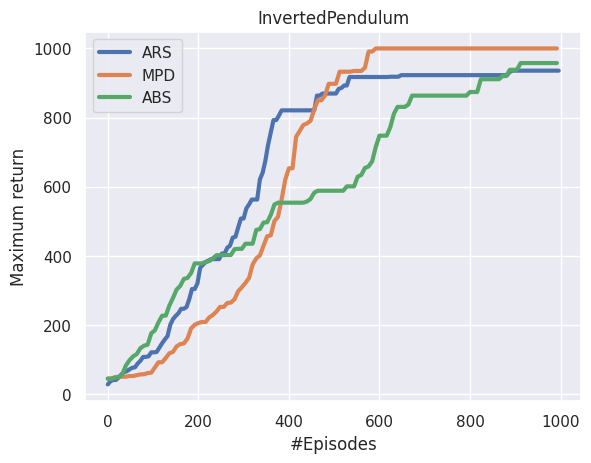

In [14]:

import pandas as pd 
import seaborn as sns
n_episodes = 1000
plot_title = "InvertedPendulum"
df = pd.read_csv("/media/mahdi/write/"+"InvertedPendulum"+"_undisc.csv")

columns = [c for c in df.columns if c.endswith("maximum")]
columns += ["n_episodes"]

df = df[columns]
df = df[df["n_episodes"]<n_episodes]
print(df)

for algo in ["ars","mpd","abs"]:

    keys = [c for c in df if algo.upper() in c]
    df1 = df[keys+["n_episodes"]]
    df1 = df1.dropna(axis=0)
    df1 = pd.melt(df1, id_vars='n_episodes', value_vars=keys, value_name='Maximum return')
    df1 = df1[["n_episodes","Maximum return"]]
    df1.rename(columns={'n_episodes':'#Episodes'}, inplace=True)
    sns.lineplot(df1,x="#Episodes",y="Maximum return",label=algo.upper(),linewidth=3,errorbar=('ci', 68)).set(title=plot_title)


In [ ]:
 
def plot_ablation(filename,n_dims,n_episodes,legend):
    
        plot_title = filename+" "+n_dims
        df = pd.read_csv("/media/mahdi/write/"+filename+"(ablation).csv")
        good_cols = [c for c in df.columns if c.endswith("absolute_disc_maximum")]
        df = df[good_cols+["n_episodes"]]
        df = df[df["n_episodes"]<n_episodes]
        for algo in ["Single","Average","Softmax","Average + R","Softmax + R"]:
        
                keys = [c for c in df if algo in c]
                df1 = df[keys+["n_episodes"]]
                df1 = df1.dropna(axis=0)
                df1 = pd.melt(df1, id_vars='n_episodes', value_vars=keys, value_name='Maximum return')
                df1 = df1[["n_episodes","Maximum return"]]
                df1.rename(columns={'n_episodes':'#Episodes'}, inplace=True)
                sns.lineplot(df1,x="#Episodes",y="Maximum return",label=algo.upper(),linewidth=3,errorbar=('ci', 68)).set(title=plot_title)
        
        if not legend : 
                plt.legend([], [], frameon=False)
        
        plt.savefig("ablation_"+filename.lower()+".pdf", format="pdf", bbox_inches="tight")                
        plt.show()


filename = ["Swimmer","Halfcheetah","Ant"]
n_dims = ["(#n_dims="+str(i)+")" for i in [16,102,216]]
n_episodes = [1000,5000,5000]
legend = [True,False,False]

for  x in zip(filename,n_dims,n_episodes,legend):
    plot_ablation(*x)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', **{'size' : 16})


def plot_R2(filename,n_dims,n_episodes,legend):
    
    plot_title = filename+" "+n_dims
    df = pd.read_csv("/media/mahdi/write/"+filename+"_R2.csv")
    df = df[df["n_episodes"]<5000]

    df = df.rename(columns={'Grouped runs (ABS) - R2_validation':'R2_validation','Grouped runs (ABS) - R2local_real':'R2_test'})
    good_cols = ["R2_validation","R2_test"]
    df = df[good_cols+["n_episodes"]]
    df[good_cols] = df[good_cols].clip(lower=-1,upper=1)


    
    # sns.histplot(data=df[good_cols].melt(), x='value', hue='variable', bins=20,
    #             stat="percent",
    #             multiple='dodge'
    #             )
    # corr = str(round(df['R2_validation'].corr(df['R2_test']),3))
    # plt.gca().legend_.set_title('Correlation:'+corr)
    # plt.show()


    df.rename(columns={'n_episodes':'#Episodes'}, inplace=True)
    sns.lineplot(data=df.melt(['#Episodes']),x="#Episodes",y="value",hue="variable",linewidth=3,alpha=1.)
    plt.axhline(0, ls='--',color="grey")
    ax = plt.gca()
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=plot_title, frameon=False)

    
    plt.savefig("R2_"+filename.lower()+".pdf", format="pdf", bbox_inches="tight")
    plt.show()

    plt.show()


filename = ["Halfcheetah","Walker2d","Ant"]
n_dims = ["(#n_dims="+str(i)+")" for i in [102,102,216]]
n_episodes = [5000,5000,5000]
legend = [True,False,False]

for  x in zip(filename,n_dims,n_episodes,legend):
    plot_R2(*x)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', **{'size' : 16})


def plot_R2(filename,n_dims,n_episodes,legend):
    
    plot_title = filename+" "+n_dims
    df = pd.read_csv("/media/mahdi/write/"+filename+"_R22.csv")
    df = df[df["n_episodes"]<5000]

    df = df.rename(columns={'Grouped runs (ABS) - R2_validation':'R2_validation','Grouped runs (ABS) - R2local_real':'R2_test'})
    good_cols = ["R2_validation","R2_test"]
    df = df[good_cols+["n_episodes"]]
    df[good_cols] = df[good_cols].clip(lower=-1,upper=1)


    
    sns.histplot(data=df[good_cols].melt(), x='value', hue='variable', bins=20,
                stat="percent",
                multiple='dodge'
                )
    corr = str(round(df['R2_validation'].corr(df['R2_test']),3))
    plt.gca().legend_.set_title('Correlation:'+corr)
    plt.show()


    df.rename(columns={'n_episodes':'#Episodes'}, inplace=True)
    sns.lineplot(data=df.melt(['#Episodes']),x="#Episodes",y="value",hue="variable",linewidth=3,alpha=1.)
    plt.axhline(0, ls='--',color="grey")
    ax = plt.gca()
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=plot_title, frameon=False)

    plt.show()


filename = ["Halfcheetah","Walker2d","Ant"]
n_dims = ["(#n_dims="+str(i)+")" for i in [102,102,216]]
n_episodes = [5000,5000,5000]
legend = [True,False,False]

for  x in zip(filename,n_dims,n_episodes,legend):
    plot_R2(*x)